# CIFAR 10

In [3]:
import time
import os, sys
import numpy as np
import matplotlib.pyplot as plt
# add path to the lib
module_path = os.path.abspath(os.path.join('/Users/vayer/Documents/tvayer.github.io/cours/deep_ecn_2018/code_deep_ecn/lib'))
#module_path = os.path.abspath(os.path.join('/share/home/vayer/cluster-home/cours/code_deep_ecn/lib'))
sys.path.append(module_path)

In [4]:
from keras.datasets import cifar10
from dcgan import DCGAN
from wgan import WGAN

In [5]:
wgan=WGAN(channels=3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 9, 9, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 9, 9, 32)          128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 9, 9, 32)          0         
__________

In [6]:
dcgan=DCGAN(channels=3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 16, 16, 32)        896       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 9, 9, 64)          0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 9, 9, 64)          256       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 9, 9, 64)          0         
__________

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
num_classes = 10 

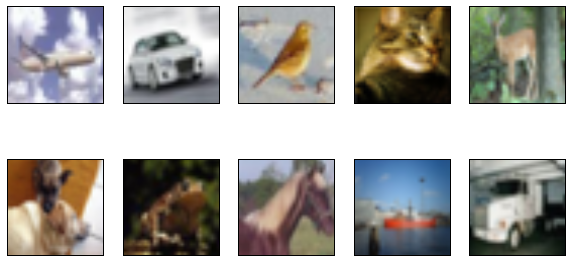

In [10]:
fig = plt.figure(figsize=(10,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    plt.imshow(features_idx[img_num,::])
plt.show()

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [12]:
x_train_cat=x_train[np.where(y_train[:]==3)[0],::]
x_test_cat=x_train[np.where(y_test[:]==3)[0],::]

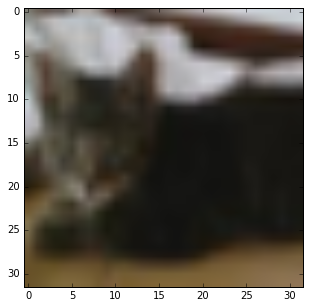

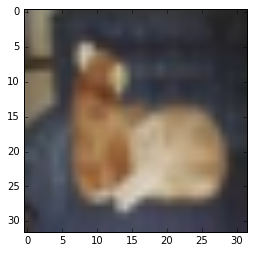

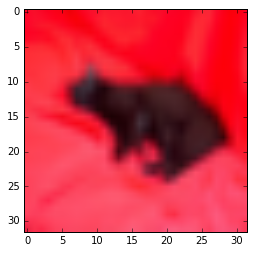

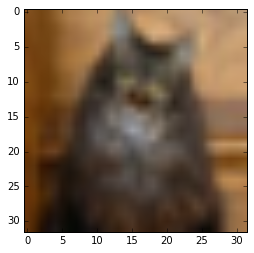

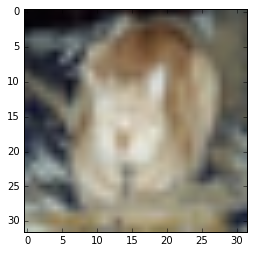

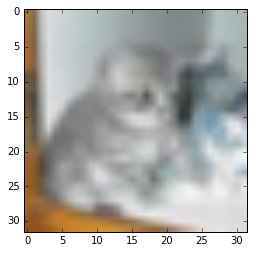

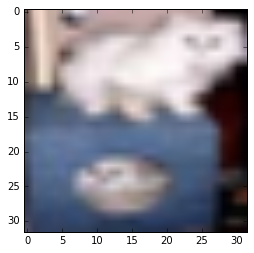

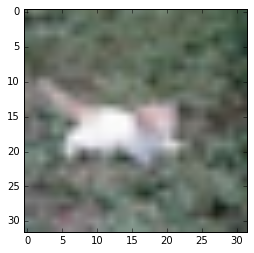

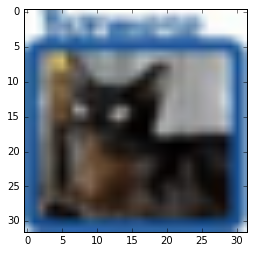

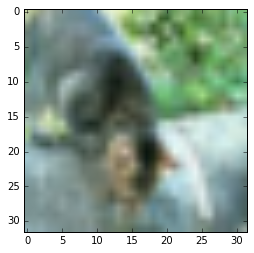

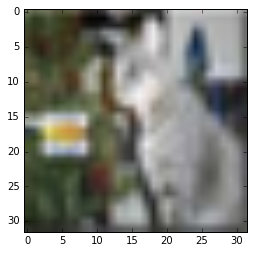

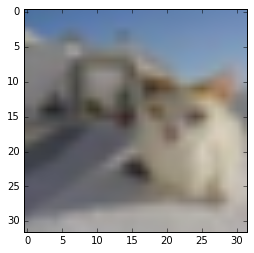

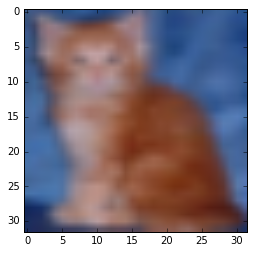

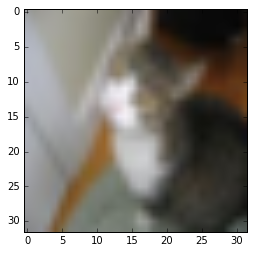

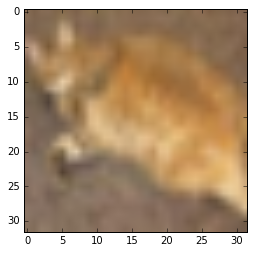

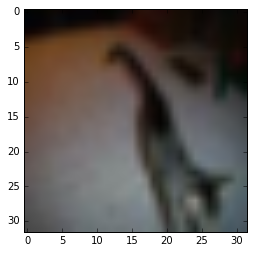

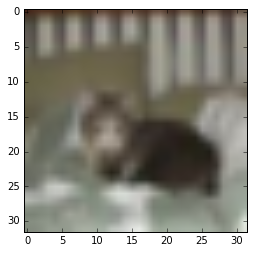

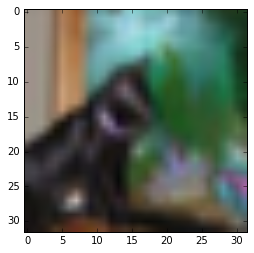

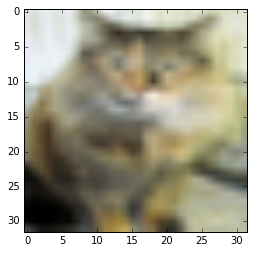

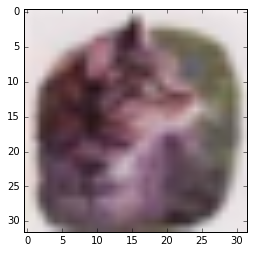

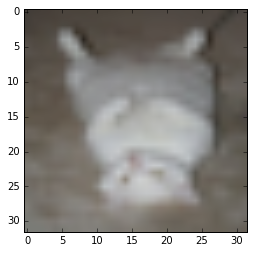

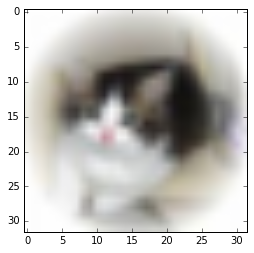

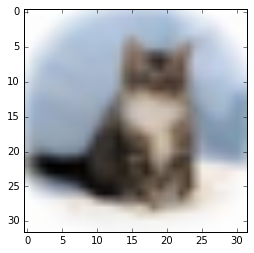

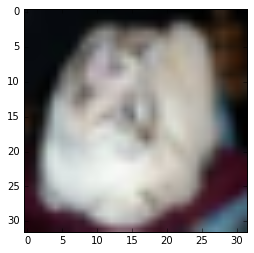

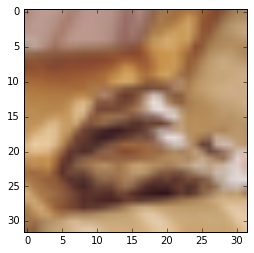

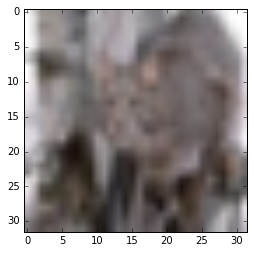

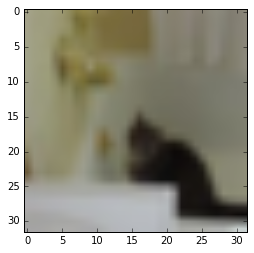

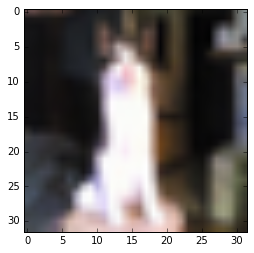

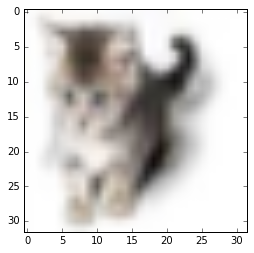

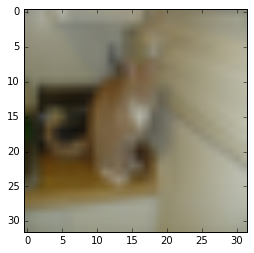

In [23]:
fig = plt.figure(figsize=(10,5))
for k in range(30):
    plt.imshow(x_train_cat[k,::])
    plt.show()

In [ ]:
x_train_dog=x_train[np.where(y_train[:]==5)[0],::]
x_test_dog=x_train[np.where(y_test[:]==5)[0],::]

In [ ]:
x_train_dog.shape

In [ ]:
x_train_cat.shape

In [ ]:
batch_size=32
epochs=10000

In [ ]:
# Adversarial ground truths
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))
for epoch in range(epochs):
    idx = np.random.randint(0, x_train_cat.shape[0], batch_size)
    imgs = x_train_cat[idx]
    noise = np.random.normal(0, 1, (batch_size, dcgan.latent_dim))
    gen_imgs = dcgan.generator.predict(noise)
    d_loss_real = dcgan.discriminator.train_on_batch(imgs, valid)
    d_loss_fake = dcgan.discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    g_loss = dcgan.combined.train_on_batch(noise, valid)
    print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

In [ ]:
batch_size=128
epochs=100

In [ ]:
valid = -np.ones((batch_size, 1))
fake = np.ones((batch_size, 1))
for epoch in range(epochs):
    for _ in range(wgan.n_critic):
        idx = np.random.randint(0, x_train_dog.shape[0], batch_size)
        imgs = x_train_dog[idx]
        noise = np.random.normal(0, 1, (batch_size, wgan.latent_dim))
        gen_imgs = wgan.generator.predict(noise)
        d_loss_real = wgan.critic.train_on_batch(imgs, valid)
        d_loss_fake = wgan.critic.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_fake, d_loss_real)
        for l in wgan.critic.layers:
            weights = l.get_weights()
            weights = [np.clip(w, -wgan.clip_value, wgan.clip_value) for w in weights]
            l.set_weights(weights)
    g_loss = wgan.combined.train_on_batch(noise, valid)
    print ("%d [D loss: %f] [G loss: %f]" % (epoch, 1 - d_loss[0], 1 - g_loss[0]))

In [ ]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r * c, 100))
gen_imgs = wgan.generator.predict(noise)

# Rescale images 0 - 1
#gen_imgs = 0.5 * gen_imgs + 1

fig, axs = plt.subplots(r, c,figsize=(10,10))
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow(gen_imgs[cnt, :,:,:])
        axs[i,j].axis('off')
        cnt += 1
plt.show()

In [ ]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r * c, 100))
gen_imgs = dcgan.generator.predict(noise)

# Rescale images 0 - 1
#gen_imgs = 0.5 * gen_imgs + 1

fig, axs = plt.subplots(r, c,figsize=(10,10))
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow(gen_imgs[cnt, :,:,:])
        axs[i,j].axis('off')
        cnt += 1
plt.show()